In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf.db as db
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metricBundles as metricBundles
import healpy as hp

In [2]:
dbFile = 'baseline_nexp2_v1.7_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabaseFBS(dbFile, defaultTable='SummaryAllProps')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'fieldDec', 'night']
Found 452001 visits
Running:  ['opsim_Count_night_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:106: UserWarning: Optimal bin calculation tried to make 1072 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 145.989  dipole: lon: 71.0383, lat: -64.3713, amp: 40.7086
  warnings.warn(


Plotting complete.
CPU times: user 38.4 s, sys: 1.04 s, total: 39.4 s
Wall time: 39.8 s


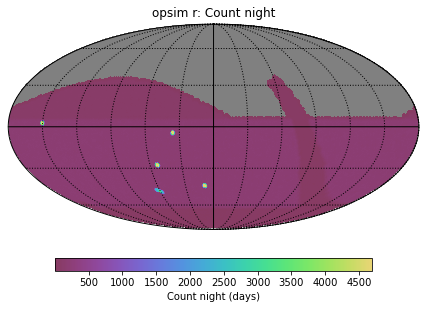

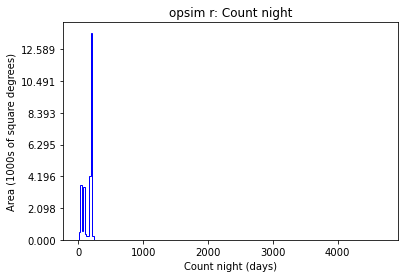

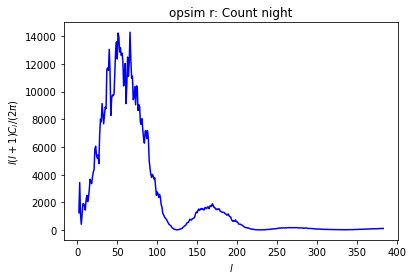

In [3]:
%%time
bundleList = []
sql = 'filter="r"'
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer()
plotDict = {}
summary_stats = [metrics.MedianMetric()]
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summary_stats))


bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [4]:
bundleList[0].summaryValues

{'Median': 189.0}

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['rotSkyPos', 'fieldDec', 'night', 'fieldRA']
Found 452001 visits
Running:  ['opsim_countCamera_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:106: UserWarning: Optimal bin calculation tried to make 1050 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 138.724  dipole: lon: 71.1762, lat: -64.4227, amp: 39.3157
  warnings.warn(


Plotting complete.
CPU times: user 1min 4s, sys: 1.11 s, total: 1min 5s
Wall time: 1min 6s


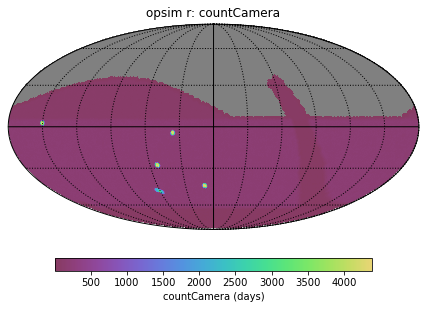

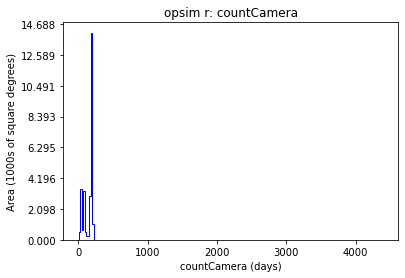

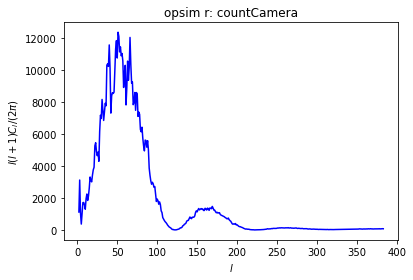

In [5]:
%%time
bundleList = []
sql = 'filter="r"'

plotDict = {}
summary_stats = [metrics.MedianMetric()]

metric = metrics.CountMetric(col='night', metricName='countCamera')
slicer = slicers.HealpixSlicer(useCamera=True, useCache=False, radius=1.75*2**0.5)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summary_stats))


bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [6]:
bundleList[0].summaryValues

{'Median': 179.0}